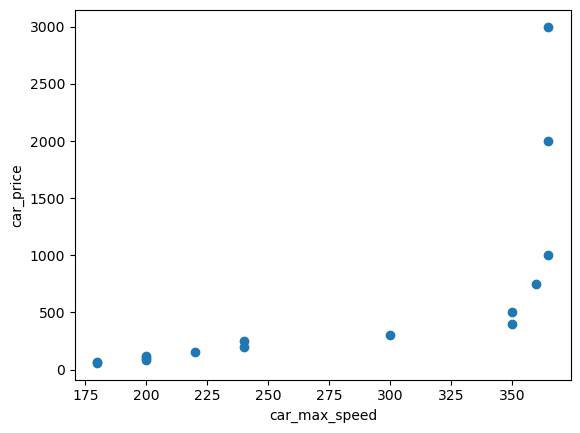

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/polynomial-regression/polynomial-regression.csv",sep = ";")

x = df.car_max_speed.values.reshape(-1,1)
y = df.car_price.values.reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("car_max_speed")
plt.ylabel("car_price")
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


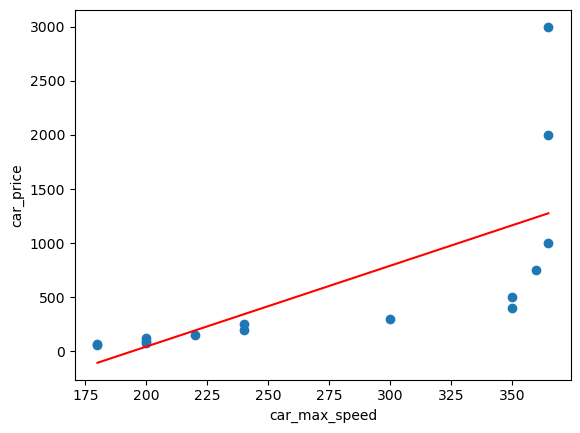

10 million TL car speed estimation:  [[73243.64746599]]


In [2]:
# linear regression =  y = b0 + b1*x
# multiple linear regression   y = b0 + b1*x1 + b2*x2

# %% linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x,y)

#%% predict
y_head = lr.predict(x)

plt.scatter(x,y)
plt.xlabel("car_max_speed")
plt.ylabel("car_price")

plt.plot(x,y_head,color="red",label ="linear")
plt.show()

print("10 million TL car speed estimation: ",lr.predict([[10000]]))

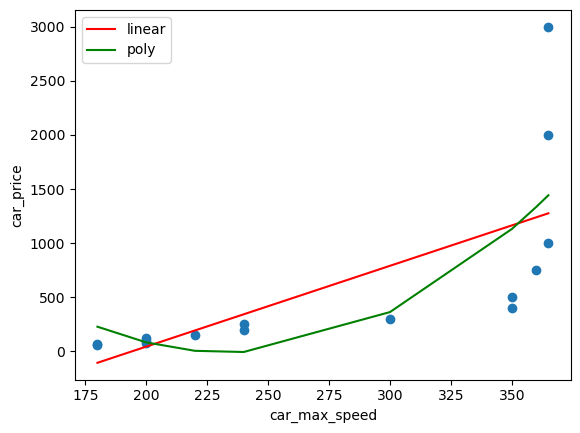

In [3]:
# %%
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n

from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_regression.fit_transform(x)


# %% fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

# %%

y_head2 = linear_regression2.predict(x_polynomial)

plt.scatter(x,y)
plt.xlabel("car_max_speed")
plt.ylabel("car_price")
plt.plot(x,y_head,color="red",label ="linear")

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()



In [4]:
#%%
from sklearn.metrics import r2_score

print("r_square score for linear regression: ", r2_score(y,y_head))

print("r_square score for polynomial regression: ", r2_score(y,y_head2))


r_square score for linear regression:  0.4745823761330057
r_square score for polynomial regression:  0.5540532844839934
